## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Dataset

In [4]:
train=pd.read_csv('dataset/train.csv')
test=pd.read_csv('dataset/test.csv')

In [5]:
#Viewing data and different features
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape 

(891, 12)

In [7]:
train.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Univariate Analysis

### Survival:
* Calculate the percentage of passengers who survived.
* Plot a bar chart showing the count of passengers who survived (1) and who did not survive (0).

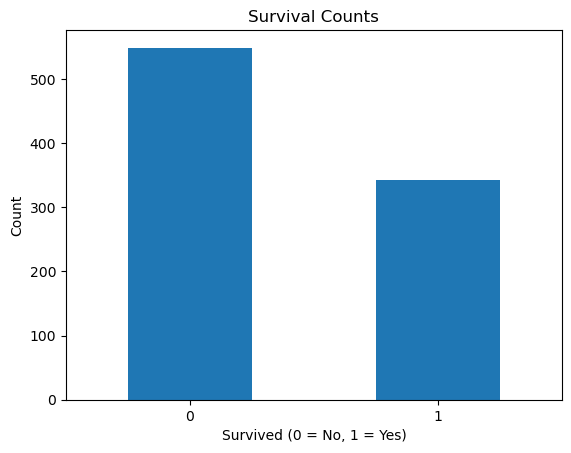

In [36]:
# Univariate analysis for Survival
survival_counts = train['Survived'].value_counts()
survival_counts.plot(kind='bar', rot=0)
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Pclass:
1. Calculate the frequency of passengers in each ticket class (1st, 2nd, 3rd).
1. Plot a bar chart showing the count of passengers in each ticket class.

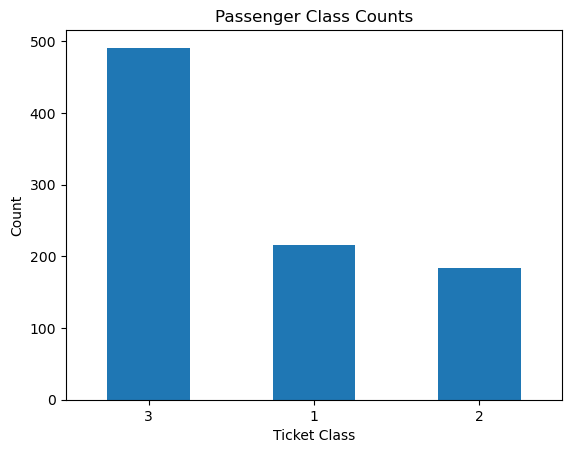

In [37]:
# Univariate analysis for Pclass
pclass_counts = train['Pclass'].value_counts()
pclass_counts.plot(kind='bar', rot=0)
plt.title('Passenger Class Counts')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.show()

### Sex:
* Calculate the frequency of male and female passengers.
* Plot a pie chart showing the proportion of male and female passengers.

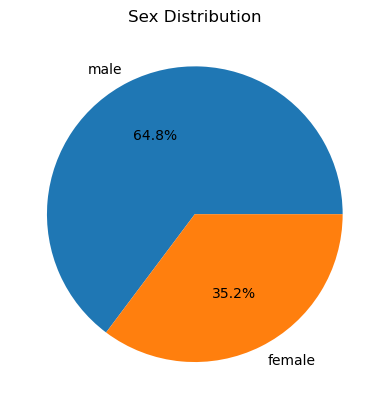

In [38]:
# Univariate analysis for Sex
sex_counts = train['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.ylabel('')
plt.show()

### Age:
* Calculate descriptive statistics such as mean, median, mode, standard deviation, minimum, and maximum age.
* Create a histogram to visualize the distribution of passenger ages.

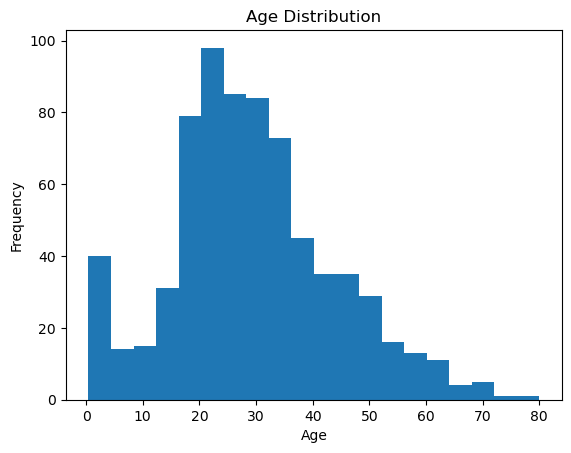

In [39]:
# Univariate analysis for Age
train['Age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### SibSp (Number of siblings or spouses aboard):
1. Calculate the frequency of passengers with different numbers of siblings or spouses.
1. Plot a bar chart or pie chart to show the distribution.

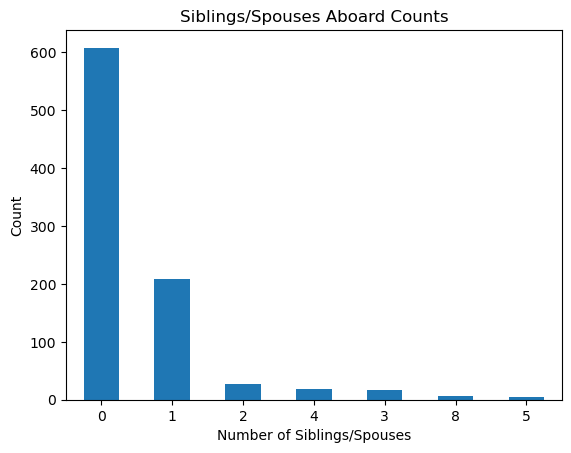

In [40]:
# Univariate analysis for SibSp
sibsp_counts = train['SibSp'].value_counts()
sibsp_counts.plot(kind='bar', rot=0)
plt.title('Siblings/Spouses Aboard Counts')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

### Parch (Number of parents or children aboard):
* Calculate the frequency of passengers with different numbers of parents or children.
* Plot a bar chart or pie chart to show the distribution.

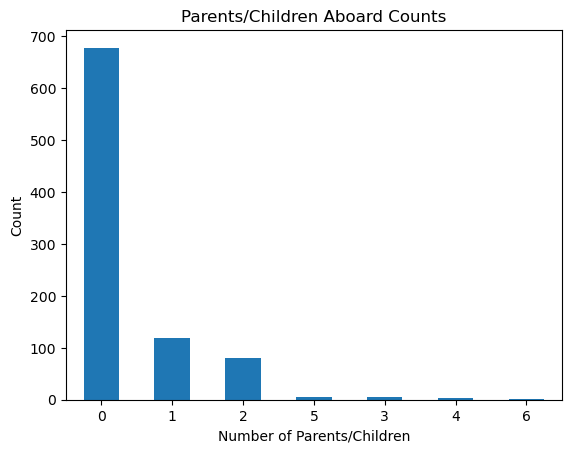

In [41]:
# Univariate analysis for Parch
parch_counts = train['Parch'].value_counts()
parch_counts.plot(kind='bar', rot=0)
plt.title('Parents/Children Aboard Counts')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

### Fare:
1. Calculate descriptive statistics for the passenger fares.
1. Create a histogram or box plot to visualize the distribution of fares.

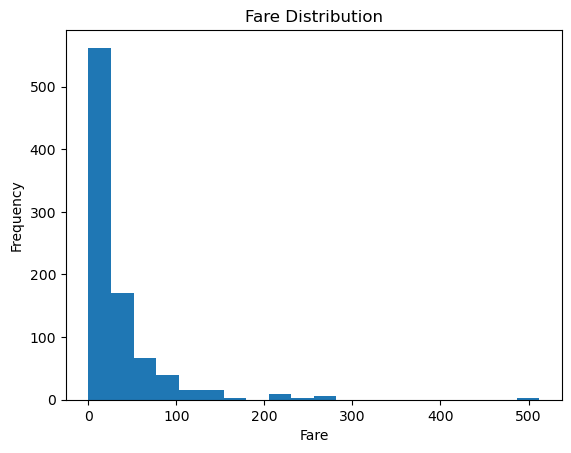

In [42]:
# Univariate analysis for Fare
train['Fare'].plot(kind='hist', bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### Cabin:
1. Calculate the number of unique cabin numbers.
1. Check for missing values and calculate the percentage of missing values.

In [43]:
# Univariate analysis for Cabin
cabin_unique_count = train['Cabin'].nunique()
cabin_missing_percentage = train['Cabin'].isnull().mean() * 100
print(f"Number of unique cabins: {cabin_unique_count}")
print(f"Percentage of missing values in Cabin column: {cabin_missing_percentage:.2f}%")

Number of unique cabins: 147
Percentage of missing values in Cabin column: 77.10%


### Embarked (Port of Embarkation):
1. Calculate the frequency of passengers embarking from each port (Cherbourg, Queenstown, Southampton).
1. Plot a bar chart to show the distribution.

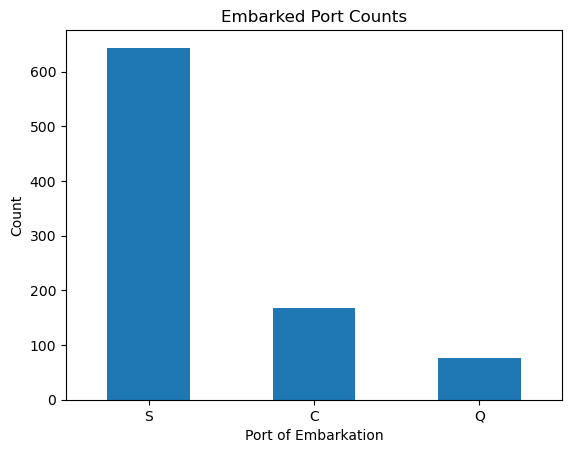

In [44]:
# Univariate analysis for Embarked
embarked_counts = train['Embarked'].value_counts()
embarked_counts.plot(kind='bar', rot=0)
plt.title('Embarked Port Counts')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

# Bivariate analysis

### Survival vs. Passenger Class (Pclass):
* Calculate the survival rate for each passenger class.
* Plot a bar chart or stacked bar chart showing the survival counts for each passenger class.

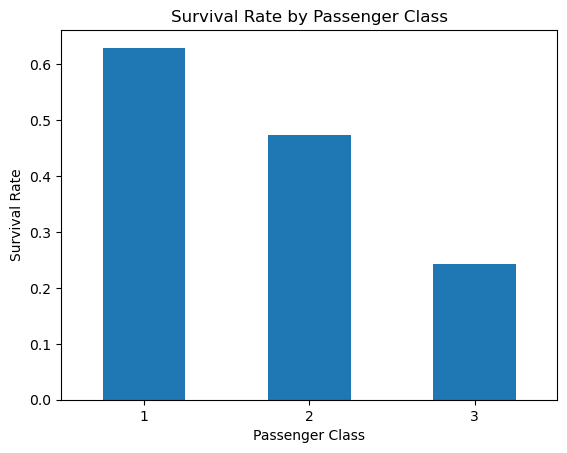

In [46]:
# Bivariate analysis for Survival vs. Passenger Class (Pclass)
survival_by_pclass = train.groupby('Pclass')['Survived'].mean()
survival_by_pclass.plot(kind='bar', rot=0)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Survival vs. Sex:
1. Calculate the survival rate for each gender.
1. Plot a bar chart or stacked bar chart showing the survival counts for each gender.


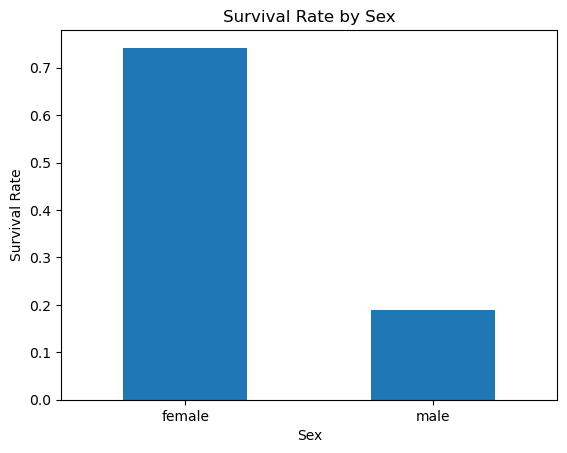

In [47]:
# Bivariate analysis for Survival vs. Sex
survival_by_sex = train.groupby('Sex')['Survived'].mean()
survival_by_sex.plot(kind='bar', rot=0)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

### Survival vs. Age:
1. Divide passengers into different age groups.
1. Calculate the survival rate for each age group.
1. Plot a bar chart or line plot showing the survival rates across different age groups.

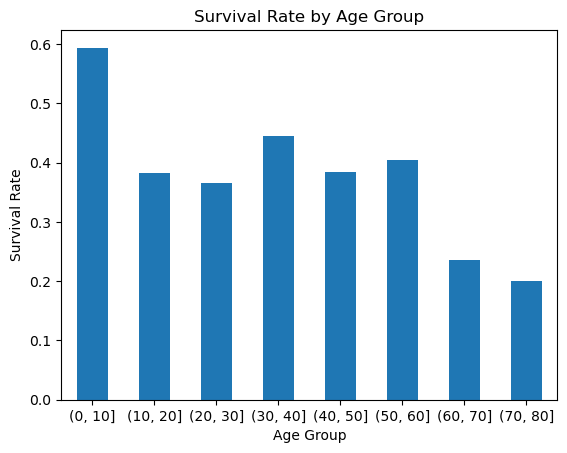

In [48]:
# Bivariate analysis for Survival vs. Age
age_bins = pd.cut(train['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
survival_by_age = train.groupby(age_bins)['Survived'].mean()
survival_by_age.plot(kind='bar', rot=0)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

### Survival vs. Number of Siblings/Spouses (SibSp):
* Calculate the survival rate for passengers with different numbers of siblings/spouses.
* Plot a bar chart or stacked bar chart showing the survival counts for each category.

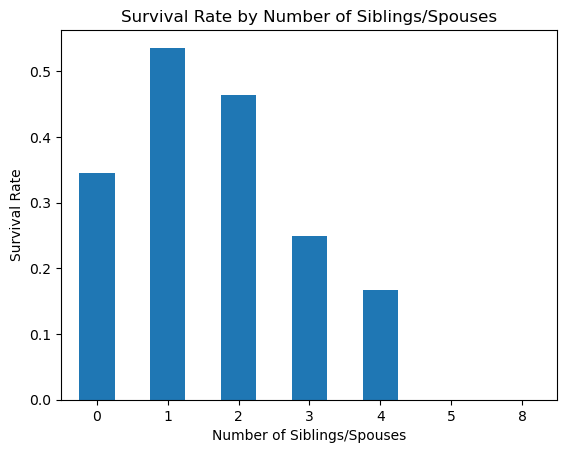

In [49]:
# Bivariate analysis for Survival vs. Number of Siblings/Spouses (SibSp)
survival_by_sibsp = train.groupby('SibSp')['Survived'].mean()
survival_by_sibsp.plot(kind='bar', rot=0)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

### Survival vs. Number of Parents/Children (Parch):
* Calculate the survival rate for passengers with different numbers of parents/children.
* Plot a bar chart or stacked bar chart showing the survival counts for each category.

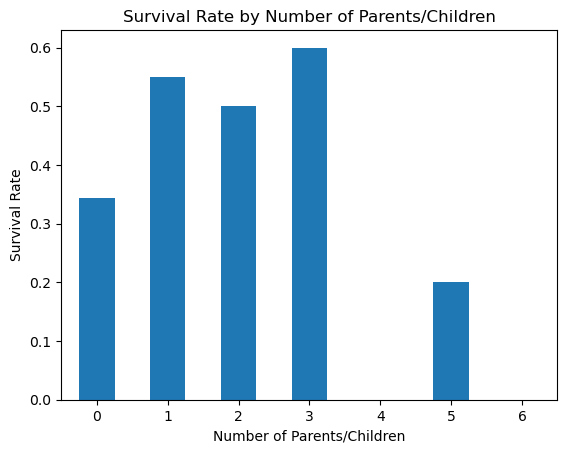

In [50]:
# Bivariate analysis for Survival vs. Number of Parents/Children (Parch)
survival_by_parch = train.groupby('Parch')['Survived'].mean()
survival_by_parch.plot(kind='bar', rot=0)
plt.title('Survival Rate by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()

### Survival vs. Fare:
1. Divide passengers into fare ranges.
1. Calculate the survival rate for each fare range.
1. Plot a bar chart or line plot showing the survival rates across different fare ranges.

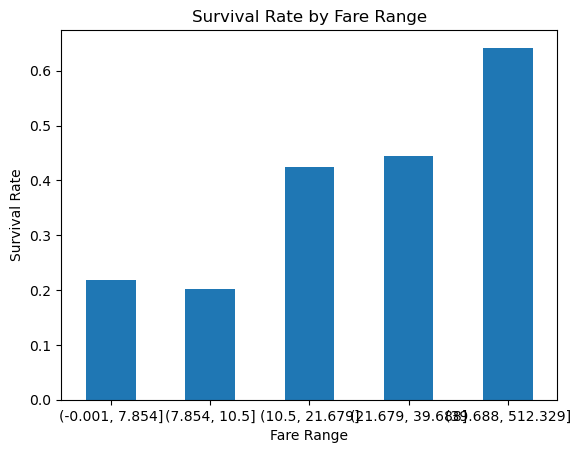

In [51]:
# Bivariate analysis for Survival vs. Fare
fare_bins = pd.qcut(train['Fare'], q=5)
survival_by_fare = train.groupby(fare_bins)['Survived'].mean()
survival_by_fare.plot(kind='bar', rot=0)
plt.title('Survival Rate by Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.show()

### Survival vs. Embarked Port:
* Calculate the survival rate for passengers from each port of embarkation.
* Plot a bar chart or stacked bar chart showing the survival counts for each port.

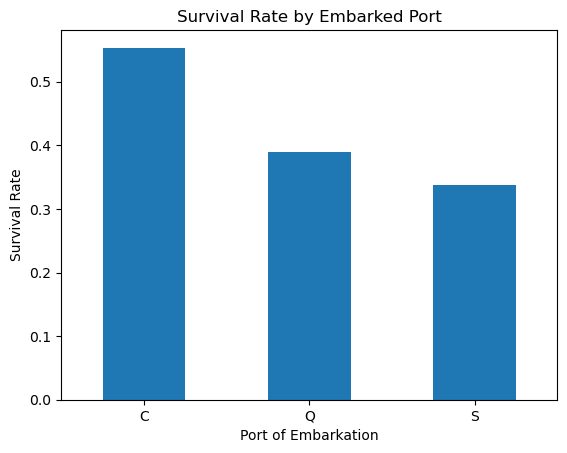

In [52]:
# Bivariate analysis for Survival vs. Embarked Port
survival_by_embarked = train.groupby('Embarked')['Survived'].mean()
survival_by_embarked.plot(kind='bar', rot=0)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

<Axes: xlabel='Sex'>

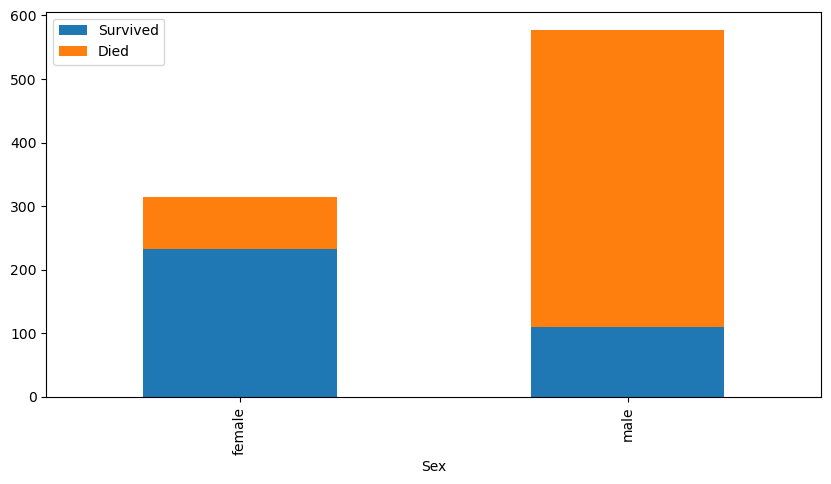

In [9]:
#Visualizing survivals based on gender
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

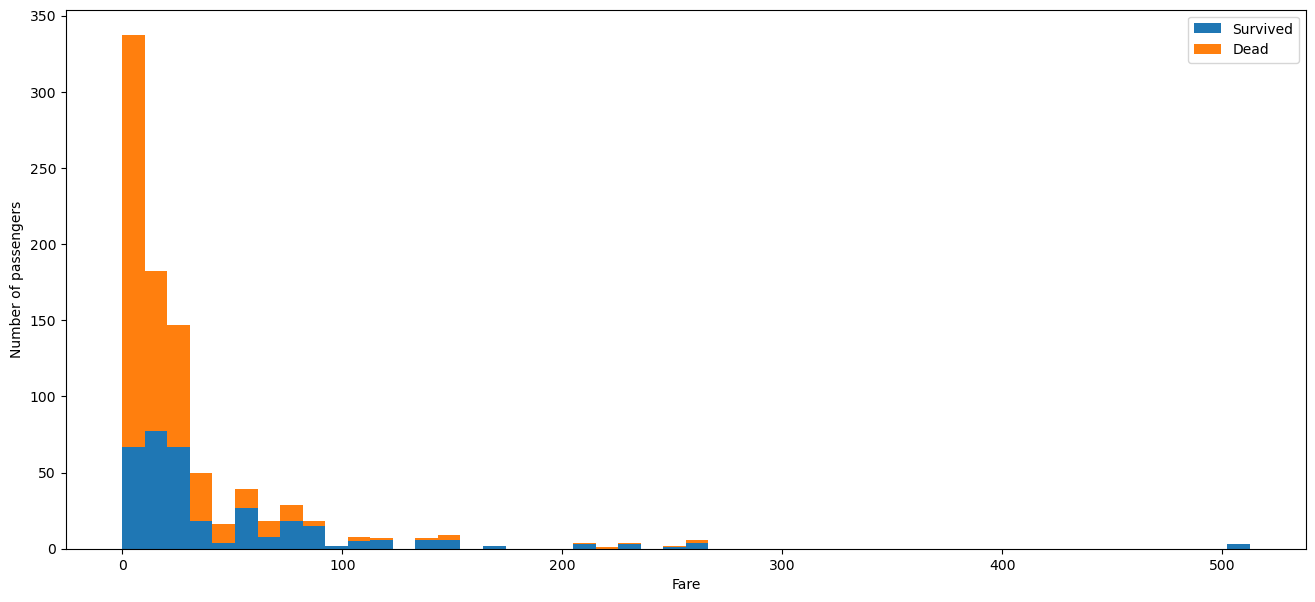

In [10]:
##Visualizing survivals based on fare
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

# Processing training data

In [11]:
#Cleaning the data by removing irrelevant columns
df1=train.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [12]:
df1.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [14]:
#Mean age of each sex
mean_age_men=df1[df1['Sex']==1]['Age'].mean()
mean_age_women=df1[df1['Sex']==0]['Age'].mean()

In [15]:
#Filling all the null values in 'Age' with respective mean age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=mean_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=mean_age_men

In [16]:
#Let's check for the null values again now
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
#Since there exist 2 null values in the Embarked column, let's drop those rows containing null values
df1.dropna(inplace=True)

In [18]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.367812,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.163124,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


# Creating model

In [20]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived)

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict = lrmod.predict(X_test)
accuracy_score(y_test, y_predict)

0.8426966292134831

<Axes: >

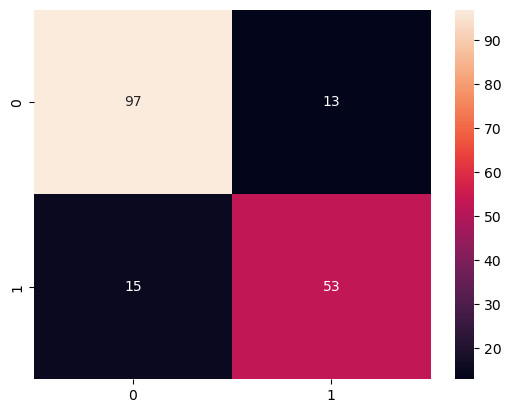

In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cma=confusion_matrix(y_test, y_predict)
sns.heatmap(cma,annot=True)

# Processing test data

In [23]:
#Viewing test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
#Cleaning the data by removing irrelevant columns
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [25]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [26]:
#Let's check for the null values
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [27]:
#Finding mean age
mean_age_men2=df2[df2['Sex']==1]['Age'].mean()
mean_age_women2=df2[df2['Sex']==0]['Age'].mean()

In [28]:
#Filling all the null values in 'Age' and 'Fare' with respective mean age and mean fare
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=mean_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=mean_age_men2
df2['Fare']=df2['Fare'].fillna(df2['Fare'].mean())

In [29]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))
df2.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,0.396975,0.447368,0.392344,0.069540
std,0.841838,0.481622,0.166617,0.896760,0.981429,0.108993
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412
50%,3.000000,1.000000,0.396972,0.000000,0.000000,0.028213
75%,3.000000,1.000000,0.469207,1.000000,0.000000,0.061484
max,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000


# **Prediction**

In [31]:
prediction = lrmod.predict(df2)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                            "Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [33]:
prediction_df = pd.read_csv('submission.csv')

<Axes: xlabel='Survived', ylabel='count'>

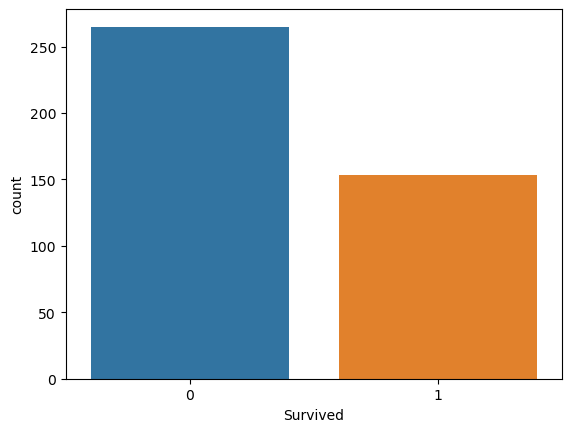

In [34]:
#Visualizing predicted values
sns.countplot(x='Survived', data=prediction_df)